# Importamos las librerías

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# Análisis de la primera planta de generación de energía

In [23]:
data= pd.read_excel("../data/hourly_w-night_weather-dataset_chronological-order_w-night.xlsx")
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data["Month"]=data["Date"].dt.month
data.columns

Index(['Date', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature',
       'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure',
       'Altimeter', 'Solar energy', '(Inverter)', 'Month'],
      dtype='object')

Las columnas de este Dataset son las siguientes:
1. DATE_TIME: Las observaciones se realizan cada 15 minutos
2. DV_POWER: Cantidad de energía DC generada por el inversor en el intervalo de 15 minutos
3. AC_POWER: Cantidad de energía generada por el inversor en el intervalo de 15 minutos
4. DAYLY_YIELD: Suma cumulativa de energía generada en el día hasta el punto en que está siendo registrada

# Análisis exploratorio

En este parte del análisis vamos a realizar una comparación de las variables más imnportantes del proceso

In [27]:
data.columns

Index(['Date', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature',
       'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure',
       'Altimeter', 'Solar energy', '(Inverter)', 'Month'],
      dtype='object')

<Axes: >

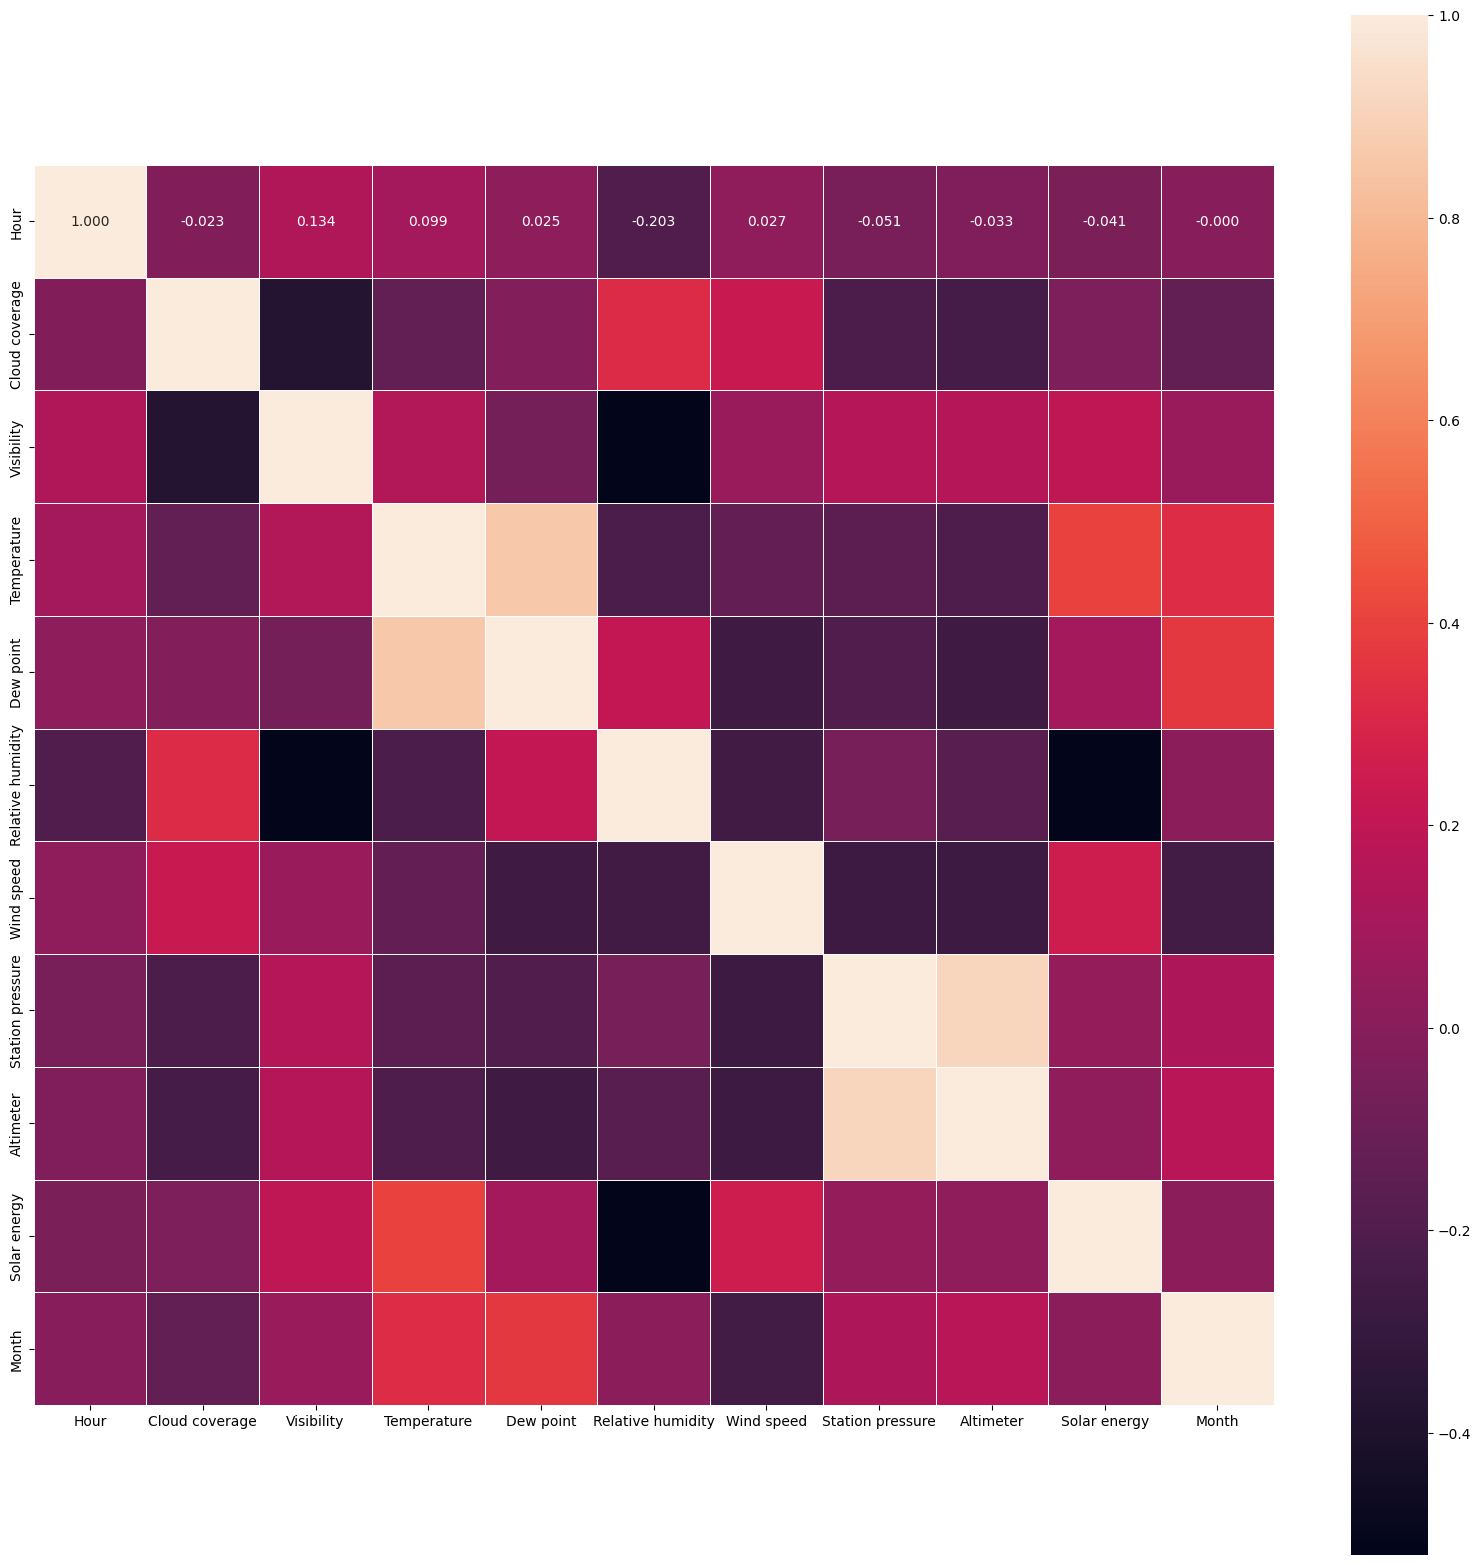

In [45]:
corr = data.drop(columns=['Date', '(Inverter)']).corr(method = 'spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)


En el mapa de correlaciones se puede obervar que existe una alta correlación entre el únto de rocío y ka temperatura del ambiente. Al igual que hay una correlación entre el altímetro y la presión 

Análisis entre la hora del día y la generación de energía

In [8]:
data.columns

Index(['Date', 'Hour', 'Cloud coverage', 'Visibility', 'Temperature',
       'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure',
       'Altimeter', 'Solar energy', '(Inverter)'],
      dtype='object')

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


<Axes: xlabel='Hour', ylabel='Solar energy'>

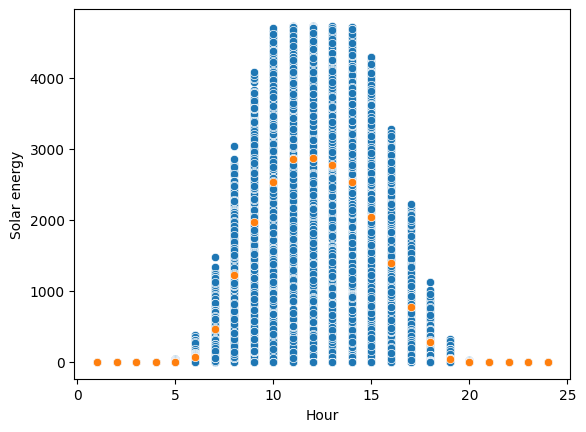

In [26]:
promedio_generacion_hora=data.groupby(["Hour"])["Solar energy"].mean()
sns.scatterplot(data, x="Hour", y="Solar energy")
sns.scatterplot(promedio_generacion_hora, markers="-")

In [10]:
data

Date  Hour  Cloud coverage  Visibility  Temperature  Dew point  \
0     2016-01-31    24             0.0        5.00         1.40       0.89   
1     2016-02-01     1             0.0        7.88         1.16       0.62   
2     2016-02-01     2             0.0        9.84         1.22       0.96   
3     2016-02-01     3             0.0        9.84         1.02       0.61   
4     2016-02-01     4             0.0        9.88         0.83       0.45   
...          ...   ...             ...         ...          ...        ...   
15067 2017-10-28    19             1.0       10.00         3.17      -1.17   
15068 2017-10-28    20             1.0       10.00         2.99      -0.24   
15069 2017-10-28    21             1.0       10.00         2.98      -0.68   
15070 2017-10-28    22             1.0       10.00         2.98      -1.16   
15071 2017-10-28    23             1.0       10.00         2.71      -0.56   

       Relative humidity  Wind speed  Station pressure  Altimeter  \
0                  95.56        9.00             29.10      29.89   
1                  91.04        7.04             29.11      29.90   
2                  89.28        8.96             29.12      29.91   
3                  89.12        6.36             29.14      29.93   
4                  90.08        6.12             29.15      29.94   
...                  ...         ...               ...        ...   
15067              72.68        6.12             29.18      29.97   
15068              81.41        6.44             29.18      29.97   
15069              78.09        5.81             29.18      29.97   
15070              75.24        4.92             29.17      29.96   
15071              77.93        5.46             29.17      29.96   

       Solar energy  (Inverter)  
0               0.0         NaN  
1               0.0         NaN  
2               0.0         NaN  
3               0.0         NaN  
4               0.0         NaN  
...             ...         ...  
15067           0.0         NaN  
15068           0.0         NaN  
15069           0.0         NaN  
15070           0.0         NaN  
15071           0.0         NaN  

[15072 rows x 12 columns]

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


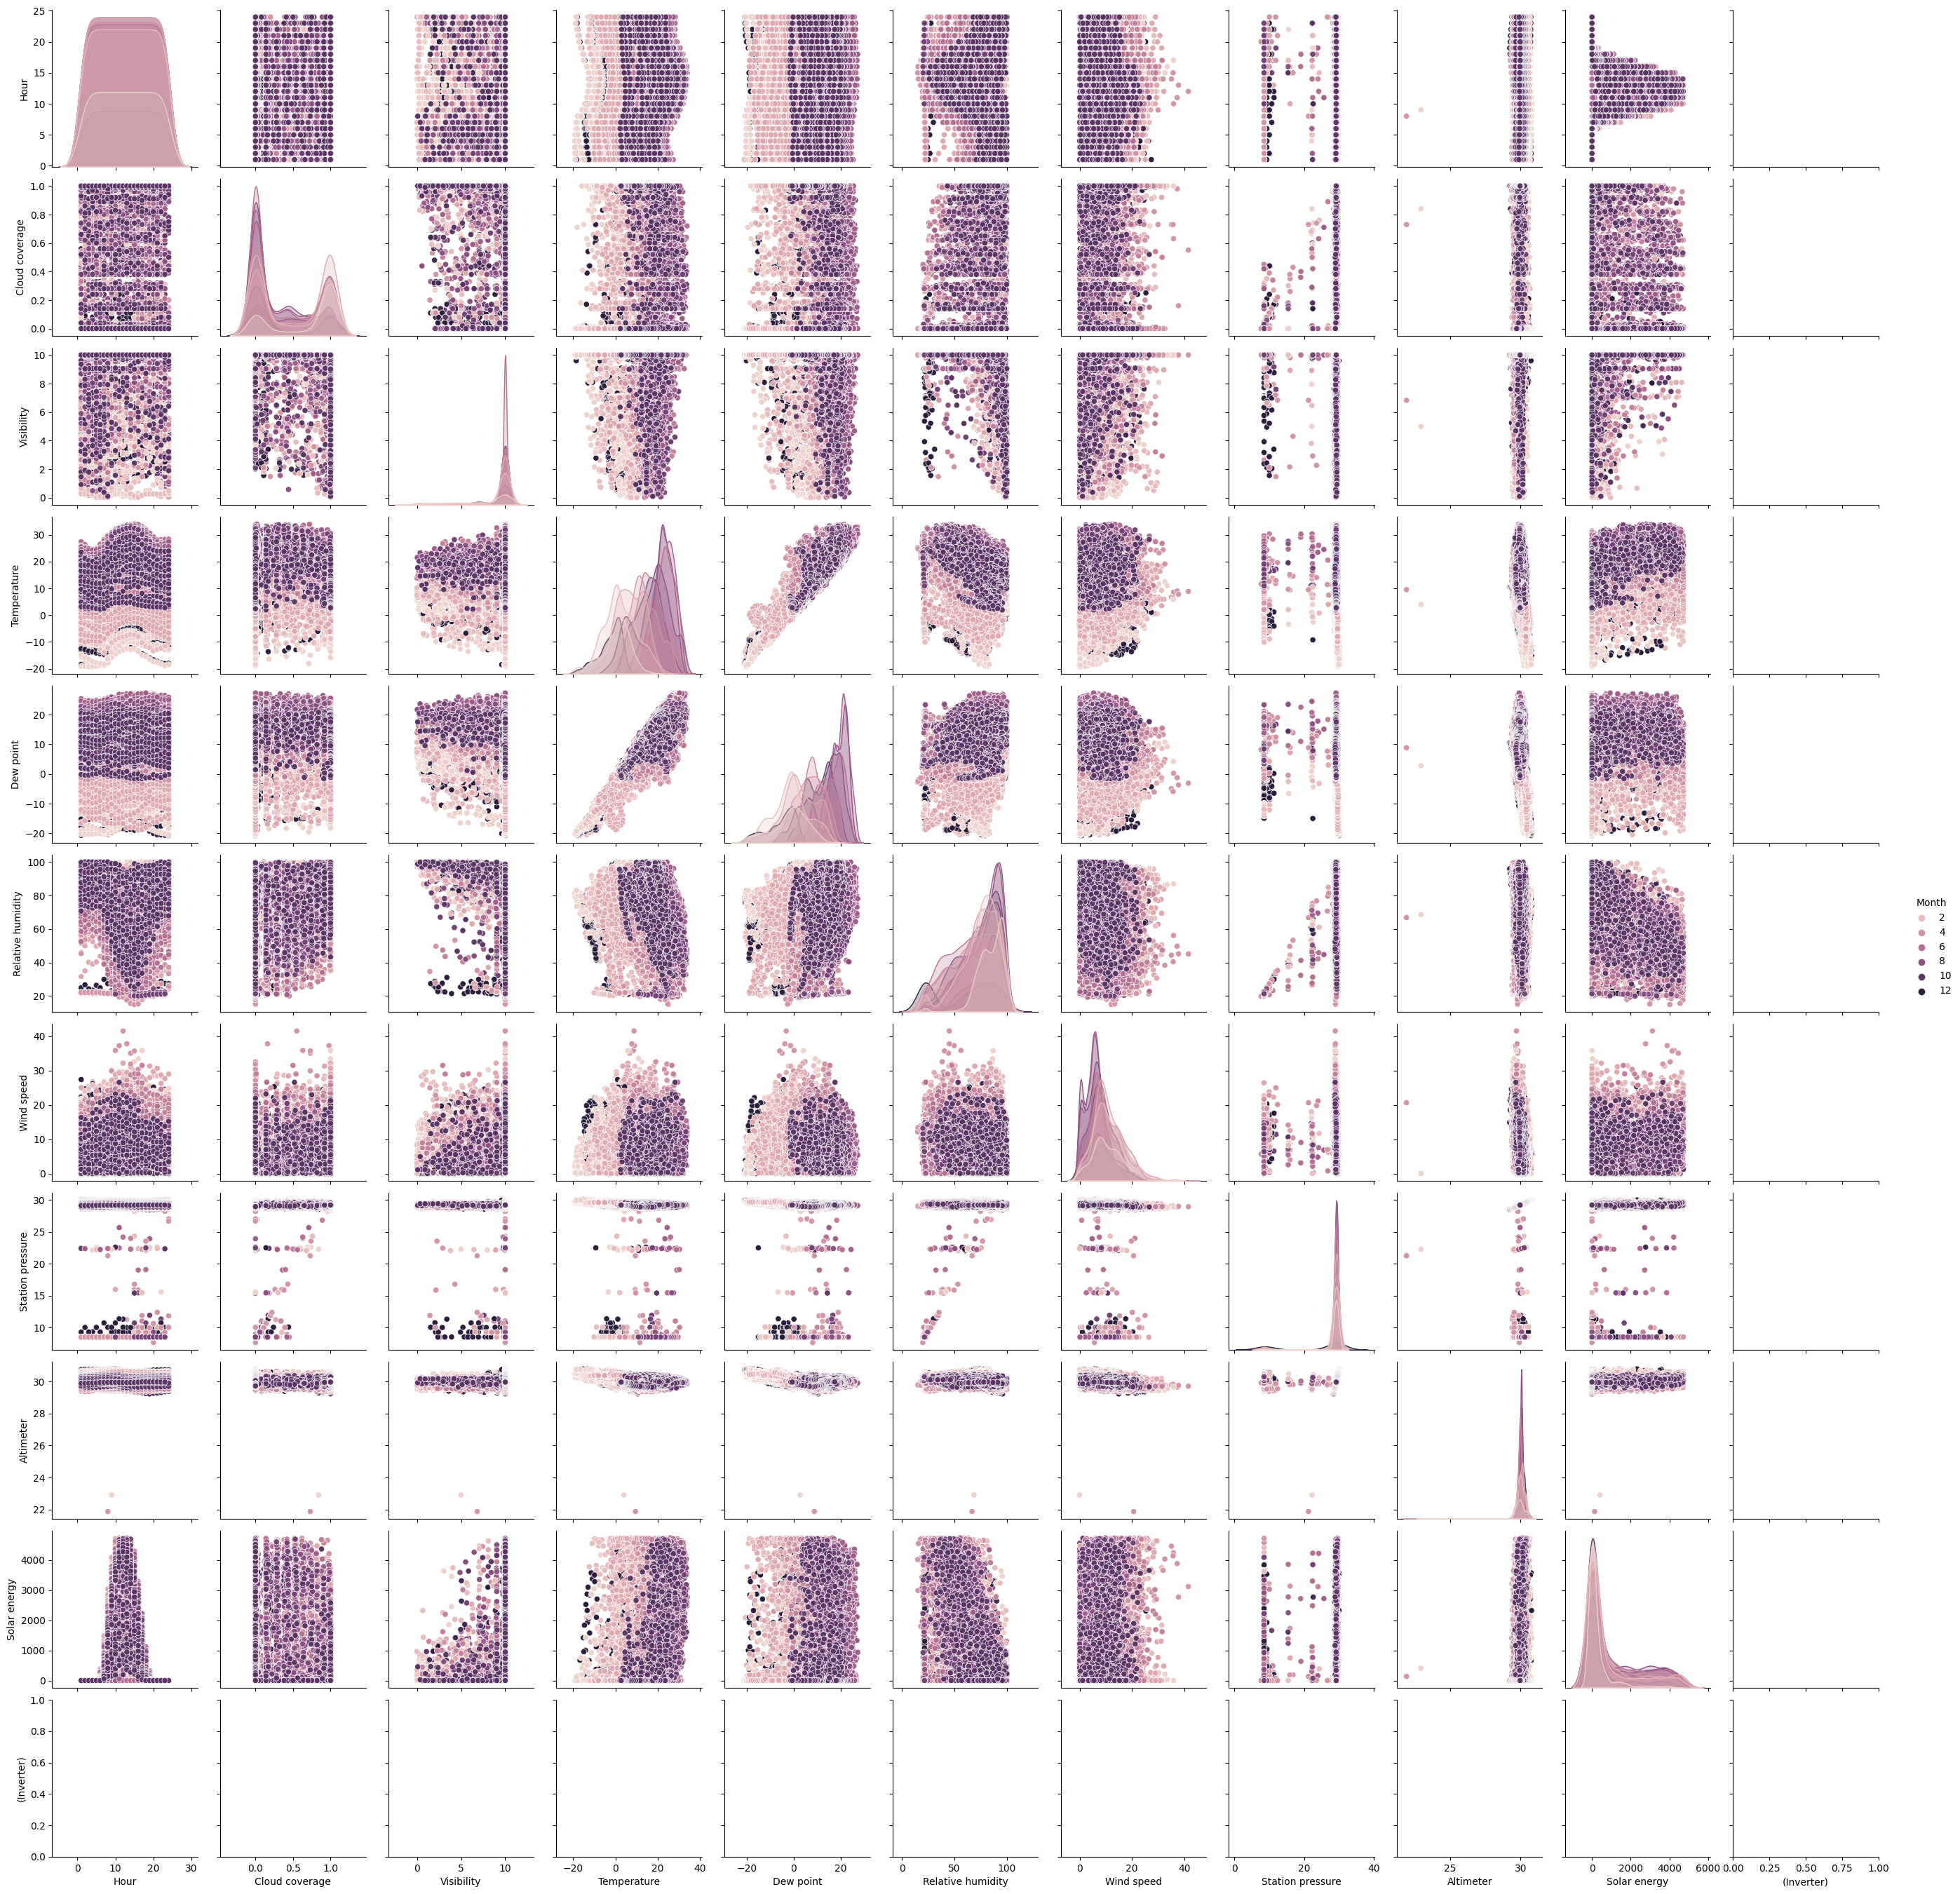

In [59]:
sns.pairplot(data, hue="Month")

# Análisis de la influencia de las condiciones climáticas

Análisis del mes

In [52]:
generacion_temperatura=data.groupby(["Hour", "Month", "Visibility", "Cloud coverage"])["Solar energy"].mean().reset_index()

In [53]:
generacion_temperatura

Hour  Month  Visibility  Cloud coverage  Solar energy
0        1      1        0.33            1.00           0.0
1        1      1        2.27            1.00           0.0
2        1      1        2.58            1.00           0.0
3        1      1        2.98            1.00           0.0
4        1      1        3.04            0.00           0.0
...    ...    ...         ...             ...           ...
7461    24     12       10.00            0.00           0.0
7462    24     12       10.00            0.11           0.0
7463    24     12       10.00            0.44           0.0
7464    24     12       10.00            0.67           0.0
7465    24     12       10.00            1.00           0.0

[7466 rows x 5 columns]

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Hour', ylabel='Solar energy'>

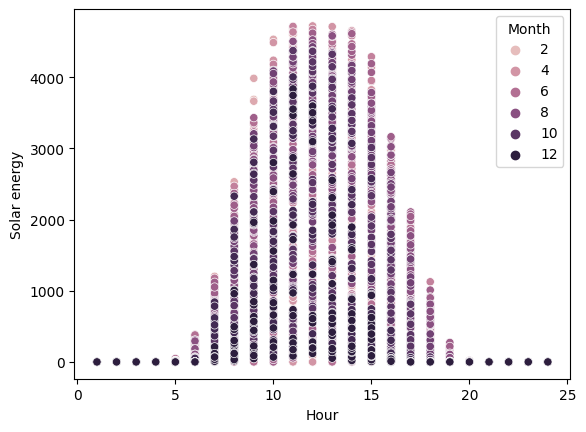

In [54]:
sns.scatterplot(generacion_temperatura, x="Hour", y= "Solar energy", hue="Month")

/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/carlos/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Month', ylabel='Cloud coverage'>

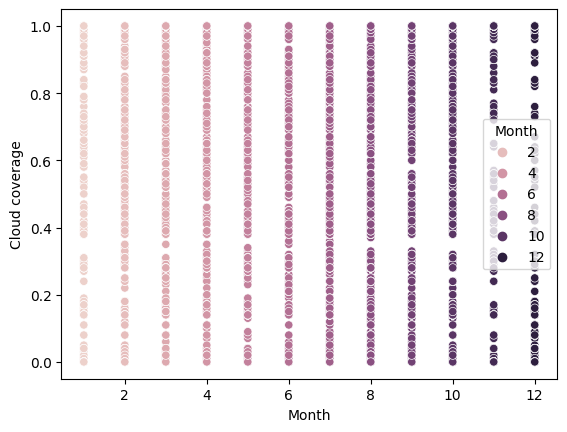

In [57]:
sns.scatterplot(generacion_temperatura, y="Cloud coverage", x= "Month", hue="Month")